For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

### Context


An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business Objectives:

1. Retain customers,
2. Analyze relevant customer data,
3. Develop focused customer retention programs.


Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.


### Instructions
1. Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
3. First look at its main features (head, shape, info).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

pd.set_option('display.max_columns', None)

In [3]:
print(customer_df.shape)
customer_df.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)


In [5]:
new_cols = []
for i in customer_df.columns:
    new_cols.append(i.lower().replace(' ','_'))
    
customer_df.columns = new_cols
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


5. Change effective to date column to datetime format.

In [6]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(pd.to_datetime)
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df



In [7]:
for col in customer_df:
    print(customer_df[col].nunique())

9134
5
8041
2
3
5
59
5
2
5694
3
3
202
36
100
6
9
3
9
4
4
5106
6
3


In [8]:
for col in customer_df:
    if customer_df[col].nunique() <= 100: 
        print(customer_df[col].name)
        print(customer_df[col].dtypes)
        print(customer_df[col].unique())


state
object
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response
object
['No' 'Yes']
coverage
object
['Basic' 'Extended' 'Premium']
education
object
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
effective_to_date
datetime64[ns]
['2011-02-24T00:00:00.000000000' '2011-01-31T00:00:00.000000000'
 '2011-02-19T00:00:00.000000000' '2011-01-20T00:00:00.000000000'
 '2011-02-03T00:00:00.000000000' '2011-01-25T00:00:00.000000000'
 '2011-01-18T00:00:00.000000000' '2011-01-26T00:00:00.000000000'
 '2011-02-17T00:00:00.000000000' '2011-02-21T00:00:00.000000000'
 '2011-01-06T00:00:00.000000000' '2011-02-06T00:00:00.000000000'
 '2011-01-10T00:00:00.000000000' '2011-01-17T00:00:00.000000000'
 '2011-01-05T00:00:00.000000000' '2011-02-27T00:00:00.000000000'
 '2011-01-14T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2011-02-05T00:00:00.000000000' '2011-01-29T00:00:00.000000000'
 '2011-02-28T00:00:00.000000000' '2011-02-12T00:00:00.000000000'
 '2011-02-02T00:00:00.0000

In [9]:
for col in customer_df:
    if (customer_df[col].nunique() <= 100) & (customer_df[col].dtypes != object): 
        print(customer_df[col].name)
        print(customer_df[col].dtypes)
        print(customer_df[col].unique())

effective_to_date
datetime64[ns]
['2011-02-24T00:00:00.000000000' '2011-01-31T00:00:00.000000000'
 '2011-02-19T00:00:00.000000000' '2011-01-20T00:00:00.000000000'
 '2011-02-03T00:00:00.000000000' '2011-01-25T00:00:00.000000000'
 '2011-01-18T00:00:00.000000000' '2011-01-26T00:00:00.000000000'
 '2011-02-17T00:00:00.000000000' '2011-02-21T00:00:00.000000000'
 '2011-01-06T00:00:00.000000000' '2011-02-06T00:00:00.000000000'
 '2011-01-10T00:00:00.000000000' '2011-01-17T00:00:00.000000000'
 '2011-01-05T00:00:00.000000000' '2011-02-27T00:00:00.000000000'
 '2011-01-14T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2011-02-05T00:00:00.000000000' '2011-01-29T00:00:00.000000000'
 '2011-02-28T00:00:00.000000000' '2011-02-12T00:00:00.000000000'
 '2011-02-02T00:00:00.000000000' '2011-02-07T00:00:00.000000000'
 '2011-01-22T00:00:00.000000000' '2011-02-13T00:00:00.000000000'
 '2011-01-15T00:00:00.000000000' '2011-01-08T00:00:00.000000000'
 '2011-01-11T00:00:00.000000000' '2011-01-28T00:00:00.000

In [10]:
# converting info from effective_to_date into 2 groups: January/February

customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month
customer_df['month'] = np.where(customer_df['month'].isin([2]), 'February', 'January')
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,February
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,January
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,February
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,January
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,February
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,February
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,February
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,February


In [11]:
customer_df['months_since_policy_inception'].unique()

array([ 5, 42, 38, 65, 44, 94, 13, 68,  3,  7, 87, 82, 25, 10, 50, 59,  1,
       21, 49, 91, 47, 64, 54,  6, 14, 56, 17, 40, 62, 86, 79, 15, 32, 28,
       16,  4, 57, 77, 95, 26, 53, 12, 98, 36, 71, 60, 20,  0, 27, 48, 33,
       83, 30, 69, 90, 81, 84, 88, 18, 11, 85, 93, 34, 89,  2, 70, 37, 43,
        8, 35, 99, 55, 75, 51, 92, 29, 63, 61, 46, 41, 31, 45, 67, 22, 23,
        9, 72, 96, 58, 66, 73, 39, 19, 97, 52, 76, 78, 80, 74, 24],
      dtype=int64)

In [12]:
names = [0,1,2,3,4,5,6,7]
bins = pd.cut(customer_df['months_since_policy_inception'],[-1,11,23,35,47,59,71,83,101], labels = names)
customer_df['years_since_policy_inception'] = bins
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,years_since_policy_inception
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,February,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,January,3
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,February,3
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,January,5
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,February,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,February,7
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,February,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,February,3
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,February,0


In [13]:
def disc_cont(df):
    ob_col = []
    dis_col = []
    con_col = []
    for col in df:
        if df[col].dtypes == object:
            ob_col.append(df[col].name)
        elif df[col].nunique() <= 100: 
            dis_col.append(df[col].name)
        else:
            con_col.append(df[col].name)

    object_df = df[ob_col].copy()
    discrete_df = df[dis_col].copy()
    continuous_df = df[con_col].copy()
    return(object_df,discrete_df, continuous_df)

In [14]:
object_df, discrete_df, continuous_df = disc_cont(customer_df)

In [15]:
discrete_df = discrete_df.drop(['effective_to_date','months_since_policy_inception'],axis=1)
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies,years_since_policy_inception
0,32,0,1,0
1,13,0,8,3
2,18,0,2,3
3,18,0,7,5
4,12,0,1,3
...,...,...,...,...
9129,18,0,2,7
9130,14,0,1,2
9131,9,3,2,3
9132,34,0,3,0


7. Plot a correlation matrix, comment what you see.

8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

9. Comment what you can see in the plots.


In [16]:
customer_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


There is only one correlation higher than 0.5, and it's the one between total_claim_amount and monthly_premium_auto, we'll have to check later if it gives us problems

In [17]:
def dis_plots(df):
    for col in df:
        sns.displot(df[col], kde=True) 
        plt.show()

In [18]:
def scatter_plots(df):
    for col1 in df:
        for col2 in df:
            if col1 != col2:
                sns.scatterplot(x=df[col1], y=df[col2])
                plt.show()

In [19]:
def hist_plots(df):
    for col in df:
        df[col].hist(bins=(df[col].nunique()))  
        plt.xlabel(df[col].name)  
        plt.show()   


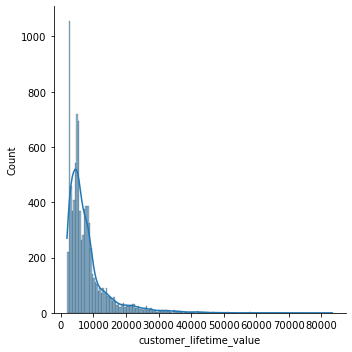

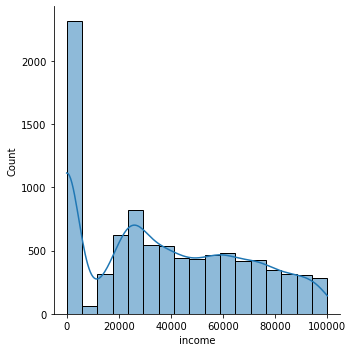

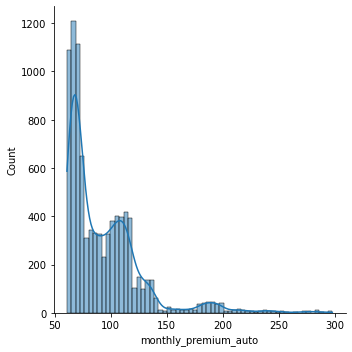

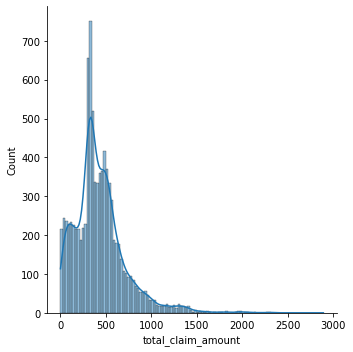

In [20]:
dis_plots(continuous_df)

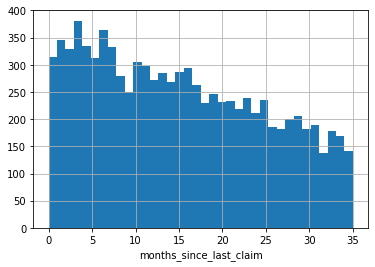

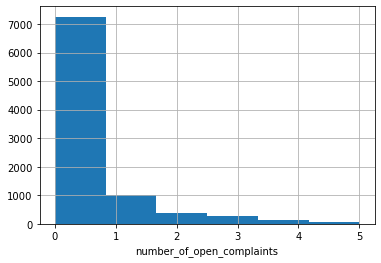

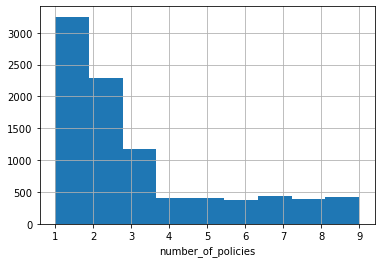

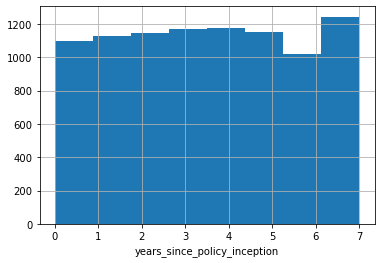

In [21]:
hist_plots(discrete_df)


10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

11. Did you find outliers? Comment what you will do with them.

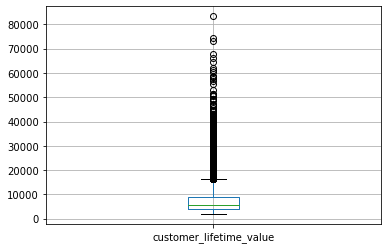

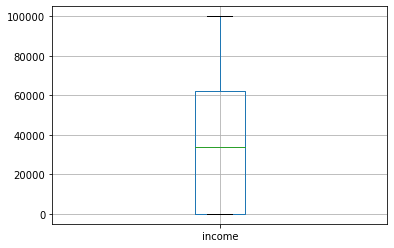

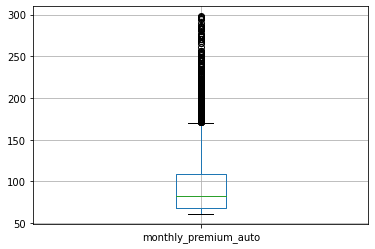

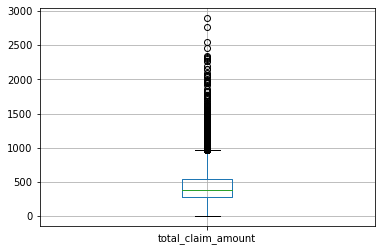

In [22]:
for col in continuous_df:
    continuous_df[[col]].boxplot()
    plt.show()



12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [23]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
month                            0
years_since_policy_inception     0
dtype: int64

### For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

#### Instructions
1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv
2. Find all of the categorical data. Save it in a categorical_df variable.

3. Check for NaN values.


In [31]:
categorical_df = object_df.drop(['customer'],axis=1)

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?
6. Does any column contain alpha and numeric data? Decide how to clean it.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.





All dtypes make sense as categorical data, the 'customer' column could be dropped in next steps if needed, because they are all unique values.

I don't see any alpha numerical data to clean.

I made 1 aditional column in previous steps, to group by month 'January' or 'February' when policies began.

In [32]:
for col in categorical_df:
    print(categorical_df[col].name)
    print(categorical_df[col].dtypes)
    print(categorical_df[col].unique())

state
object
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response
object
['No' 'Yes']
coverage
object
['Basic' 'Extended' 'Premium']
education
object
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus
object
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender
object
['F' 'M']
location_code
object
['Suburban' 'Rural' 'Urban']
marital_status
object
['Married' 'Single' 'Divorced']
policy_type
object
['Corporate Auto' 'Personal Auto' 'Special Auto']
policy
object
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type
object
['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel
object
['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class
object
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size
object
['Medsize' 'Small' 'Large']
month
object
['February' 'January']


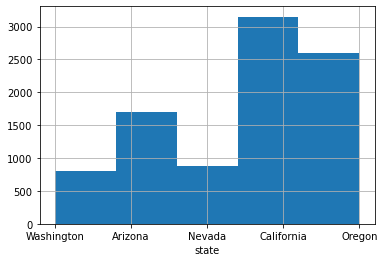

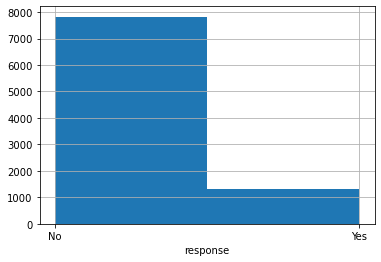

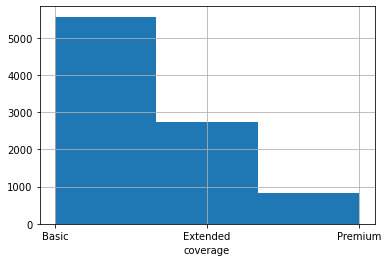

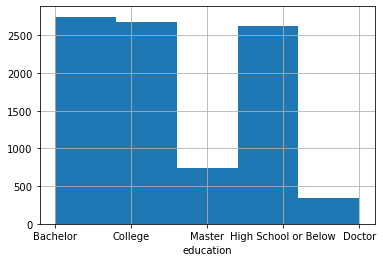

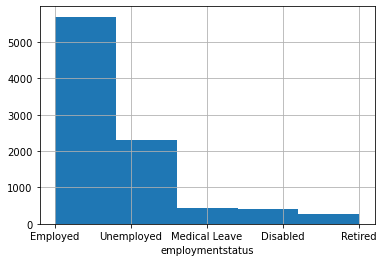

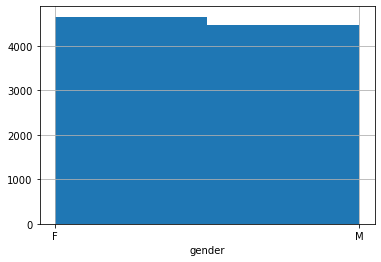

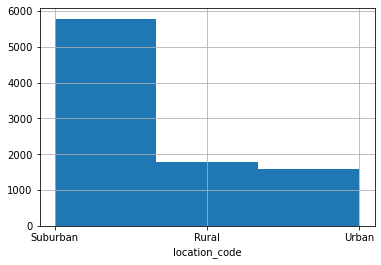

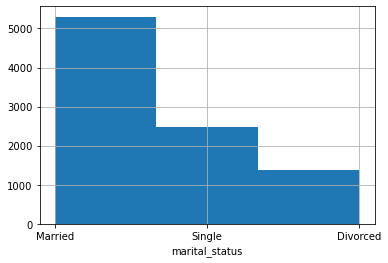

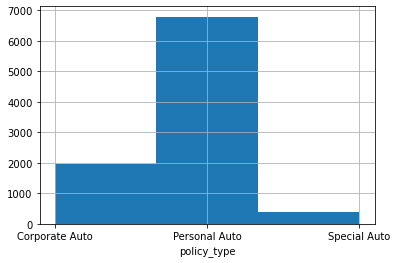

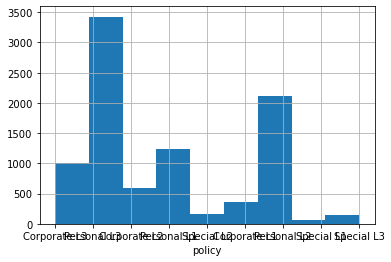

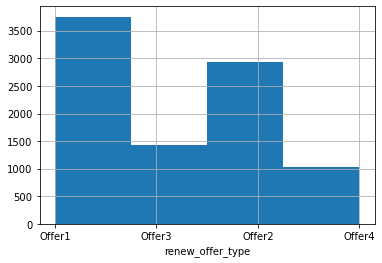

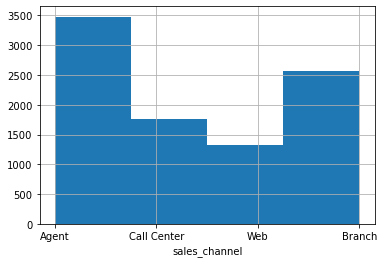

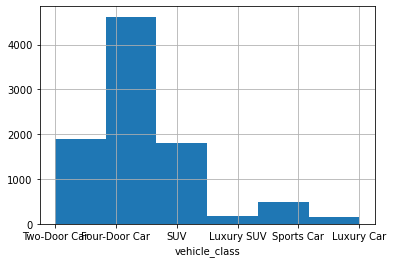

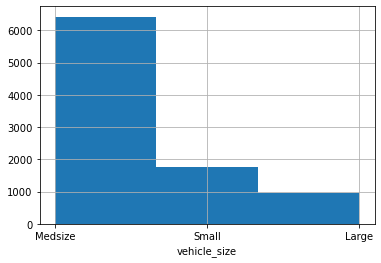

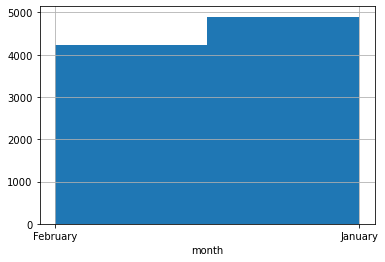

In [33]:
hist_plots(categorical_df)

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

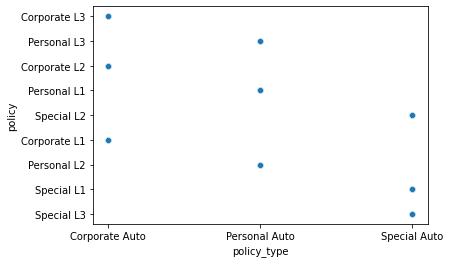

In [36]:
sns.scatterplot(x=categorical_df['policy_type'], y=categorical_df['policy'])
plt.show()



policy_type and policy have the same information, but one of them a bit more extensive, about the type of auto the policy is about and the policy given, so they have redundant data, we could keep just one of them.


9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

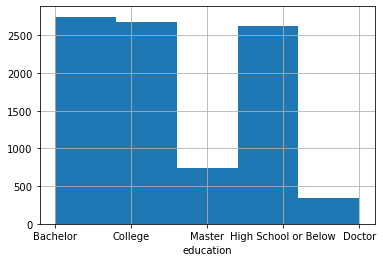

In [37]:
#  in this case we could combine Master and Doctor to ease the encoding

categorical_df['education'].hist(bins=(categorical_df['education'].nunique()))  
plt.xlabel(categorical_df['education'].name)  
plt.show()  

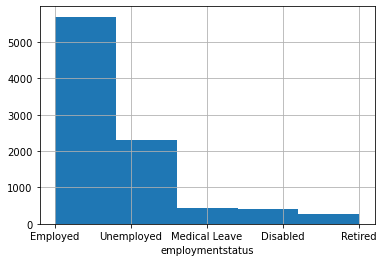

In [38]:
# in this case we could combine all the unemployed columns

categorical_df['employmentstatus'].hist(bins=(categorical_df['employmentstatus'].nunique()))  
plt.xlabel(categorical_df['employmentstatus'].name)  
plt.show()  

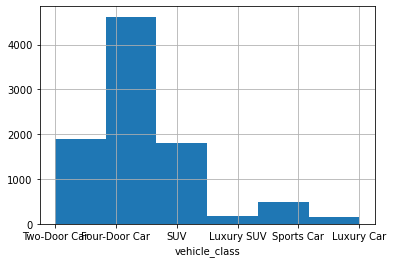

In [39]:
# in this case we could combine all the luxury cars together

categorical_df['vehicle_class'].hist(bins=(categorical_df['vehicle_class'].nunique()))  
plt.xlabel(categorical_df['vehicle_class'].name)  
plt.show()  